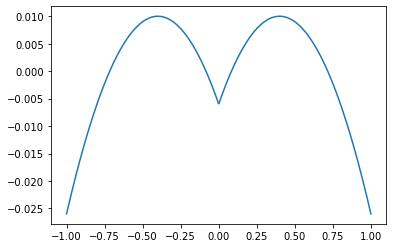

In [4]:
import numpy as np 
import matplotlib.pyplot as plt
import time
%matplotlib inline
#用numpy創建一個X的資料集，x的範圍為-1~1之間，共取1000個數
def creat_data():
    x_r = np.linspace(-1,1,1000)
    #將兩個二次函數用0做為分界串接起來
    def l1(x):
        return -0.1*(x-0.4)**2+0.01 #設定x在大於0時所使用的二次函數
    def l2(x):
        return -0.1*(x+0.4)**2+0.01 #設定x在小於0時所使用的二次函數
    y=[]
    for i in x_r:
        if i >0:
            y.append(l1(i))
        else:
            y.append(l2(i))
    y=np.array(y)
    return {"x":x_r,"y":y}
x=creat_data()["x"]
y=creat_data()["y"]
plt.plot(x,y)
#plt.plot(x_r, [l2(x)for x in x_r])

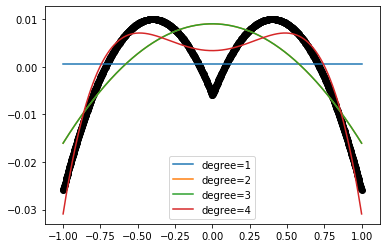

In [5]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
#使用已寫好的套件將答案預覽一次，可以藉由調整後面的參數去選擇函數的次方
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),
                         LinearRegression(**kwargs))
def sample_answer(x,n):
    x_test = x[:,None]
    for degree in range(1,n+1):
        y_test=PolynomialRegression(degree).fit(x.reshape(-1,1),y).predict(x_test)
        plt.plot(x_test.ravel(),y_test,label='degree={}'.format(degree))
    plt.scatter(x,y,color='black')
    plt.legend(loc='best')
    plt.show()
sample_answer(x,4)

In [37]:
#假設目標函數為二次的話，使用梯度下降法的做法如下
def loss(y,y_pred):
    return  (1/2)*np.sum([(y[i]-y_pred[i])**2 for i in range(len(y))])
def x2_line(x,y):
    #初始化參數
    b,c,d,e=0,0,0,0
    l=0.001
    n=1000  
    error=[]
    for i in range(1000):
        y_pred=[]
        for j in x:
            y_pred.append(c*pow(j,2)+d*j+e) 
        error.append(loss(y,y_pred))
        y_pred=np.array(y_pred)
        #對損失函數中的每一個係數做偏微分
        D_c=(-2/n)*sum(x**2*(y-y_pred))
        D_d=(-2/n)*sum(x*(y-y_pred))
        D_e=(-2/n)*sum(y-y_pred)
        #在乘上學習率之後對係數做修正
        c=c-0.002*D_c
        d=d-0.002*D_d
        e=e-0.002*D_e
    x_test = x[:,None]
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
    ax[1].scatter(range(n),error,label="error")
    ax[1].set_title('Error',color="white",fontsize=80)
    y_test=PolynomialRegression(2).fit(x.reshape(-1,1),y).predict(x_test)
    ax[0].plot(x_test.ravel(),y_test,label='sklearn_ans')
    ax[0].plot(x,y,"yo",label="raw_data")
    ax[0].plot(x,c*x**2+d*x+e,label="optimal_line")
    ax[0].set_title("function",fontsize=80,color="white")
    ax[0].legend(loc="best",prop={'size': 20})
    ax[1].legend(loc="best",prop={'size': 20})

In [43]:
#假設目標函數為四次的話，使用梯度下降法的做法如下
def x4_line(x,y):
    a,b,c,d,e=0,0,0,0,0
    l1,l2=0.1,0.1
    n=len(x) 
    error=[]
    y_test=PolynomialRegression(4).fit(x.reshape(-1,1),y).predict(x.reshape(-1,1))
    ims=[]
    for i in range(5000):
        y_pred=[]
        for j in x:
            y_pred.append(a*pow(j,4)+b*pow(j,3)+c*pow(j,2)+d*j+e) 
        error.append(loss(y,y_pred))
        y_pred=np.array(y_pred)
         #對損失函數中的每一個係數做偏微分
        D_a=(-2/n)*sum(x**4*(y-y_pred))
        D_b=(-2/n)*sum(x**3*(y-y_pred))
        D_c=(-2/n)*sum(x**2*(y-y_pred))
        D_d=(-2/n)*sum(x*(y-y_pred))
        D_e=(-2/n)*sum(y-y_pred)
        #在乘上學習率之後對係數做修正
        a=a-l2*D_a
        b=b-l1*D_b
        c=c-l2*D_c
        d=d-l1*D_d
        e=e-l2*D_e
    x_test = x[:,None]
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(30,10))
    ax[1].scatter(range(5000),error,label="error")
    ax[1].set_title('Error',fontsize=80,color="white")
    y_test=PolynomialRegression(4).fit(x.reshape(-1,1),y).predict(x_test)
    ax[0].plot(x_test.ravel(),y_test,label='sklearn_ans',color="r")
    ax[0].plot(x,y,"yo",label="raw_data")
    ax[0].plot(x,a*x**4+b*x**3+c*x**2+d*x+e,label="optimal_function")
    ax[0].set_title("function",fontsize=80,color="white")
    ax[0].legend(loc="best",prop={'size': 20})
    ax[1].legend(loc="best",prop={'size': 20})


目標函式為:
\begin{align}
 if \quad x >0&:-0.1 \cdot(x-0.4)^2+0.01 \\
     x<=0&:-0.1 \cdot(x+0.4)^2+0.01
\end{align}

所以可以從下面的圖看到raw_data所呈現出的會是一張近似於x的四次方的圖形,在第一張圖中我們使用一條x的二次方的線去模擬，而佑上方的線則是模擬線與raw_data的差距。

左下角的圖則是用四次方的圖去模擬可以看出結果明顯的比較好，而損失函數也相較於二次方來的更低。

(None, None)

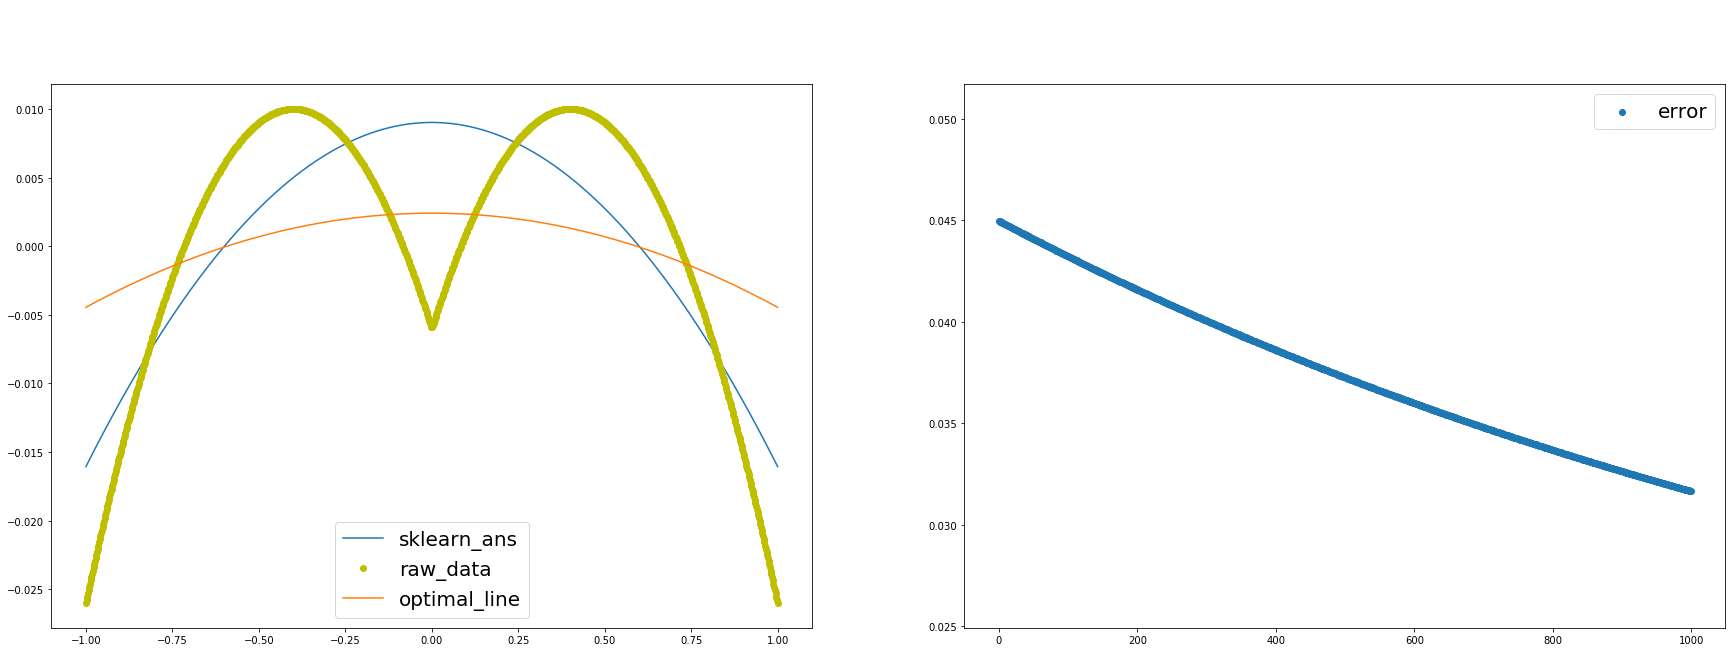

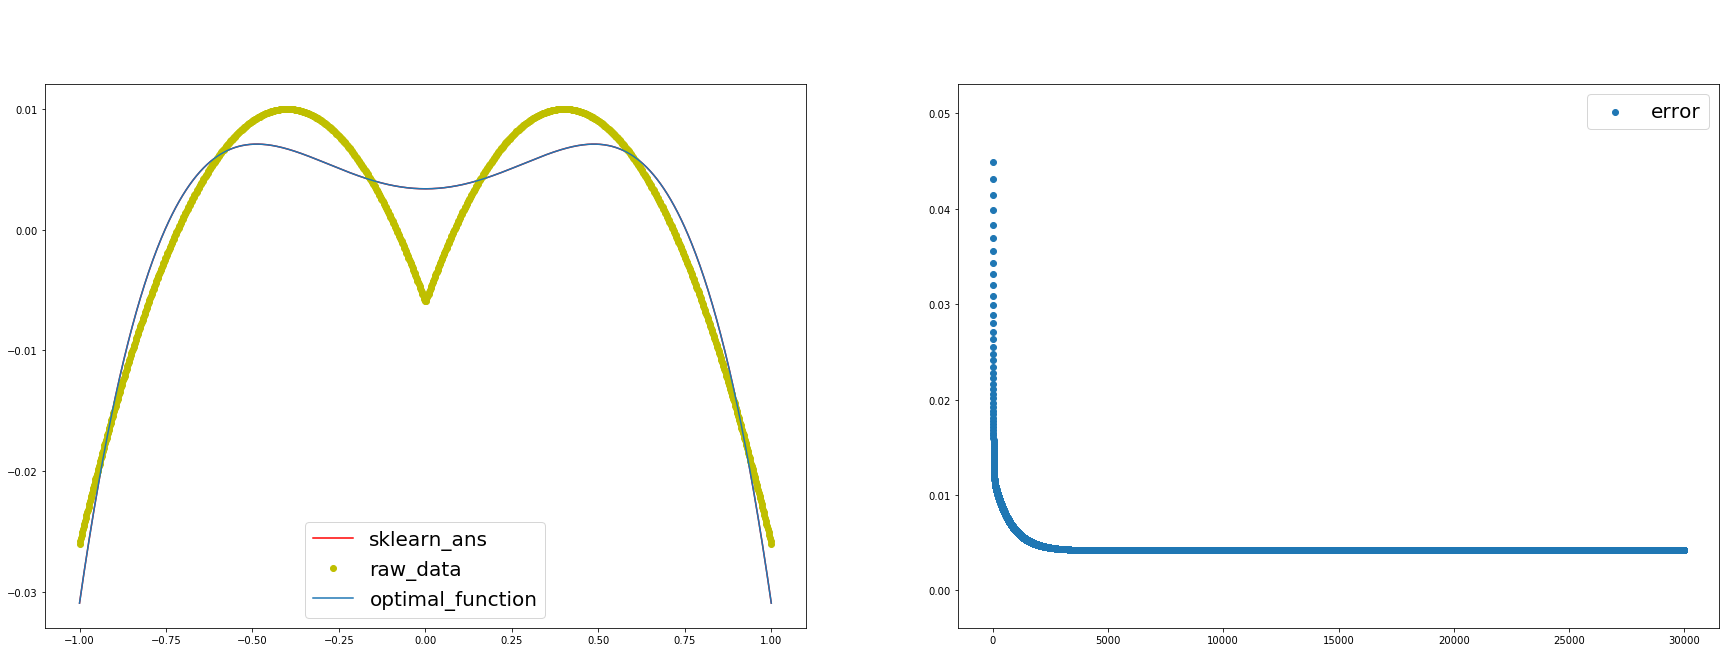

In [42]:
x2_line(x,y),x4_line(x,y)

在四次方的曲線下加入懲罰項，誘使方程式刻意地忽略某些特定的參數:
 \begin{align}
  L(x,y)=\frac{1}{2m} \sum_{i=1}^{n}(x_{i}w_{i}-y_{i})^2+\lambda \sum_{i=1}^{n}w^2_{i}
 \end{align}

-0.00396872884589863 3.05477865225613e-19 -0.02187677410816226 4.950380383394938e-19 -0.006963358060098604


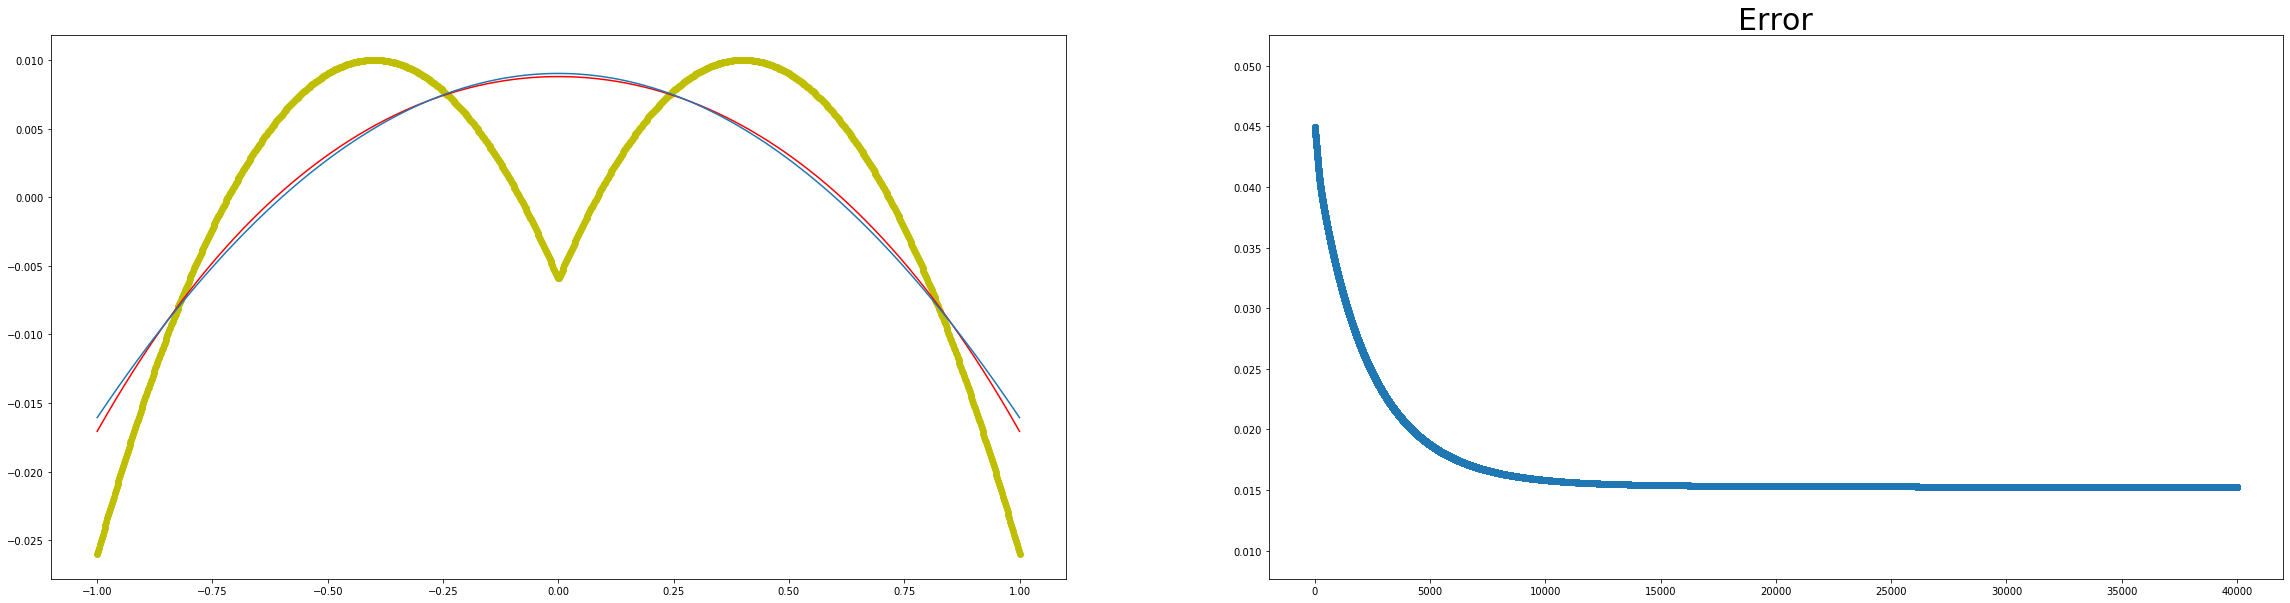

In [37]:
#假設目標函數為四次的話，使用梯度下降法再加上懲罰項的做法如下
def x4_line_smooth(x,y):
    a,b,c,d,e=0,0,0,0,0
    l1,l2=0.001,0.001 
    n=len(x)
    error=[]
    y_test=PolynomialRegression(4).fit(x.reshape(-1,1),y).predict(x.reshape(-1,1))
    for i in range(40000):
        y_pred=[]
        for j in x:
            #此處的𝜆設置為1000
            y_pred.append(a*pow(j,4)+b*pow(j,3)+c*pow(j,2)+d*j+e+1000*a**2+1000*b**2) 
        error.append(loss(y,y_pred))
        y_pred=np.array(y_pred)
         #對損失函數中的每一個係數做偏微分
        D_a=(-2/n)*sum((2000*a+x**4)*(y-y_pred))
        D_b=(-2/n)*sum((2000*b+x**3)*(y-y_pred))
        D_c=(-2/n)*sum(x**2*(y-y_pred))
        D_d=(-2/n)*sum(x*(y-y_pred))
        D_e=(-2/n)*sum(y-y_pred)
        #在乘上學習率之後對係數做修正
        a=a-l1*D_a
        b=b-l1*D_b
        c=c-l2*D_c
        d=d-l1*D_d
        e=e-l2*D_e
    fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(40,10))
    ax[1].scatter(range(40000),error)
    ax[1].set_title('Error',fontsize=30)
    ax[0].plot(x,y,"yo")
    ax[0].plot(x,a*x**4+b*x**3+c*x**2+d*x+e+1000*a**2+1000*b**2,"r")
    x_test = x[:,None]
    y_test=PolynomialRegression(2).fit(x.reshape(-1,1),y).predict(x_test)
    ax[0].plot(x_test.ravel(),y_test,label='degree={}'.format(2))
x4_line_smooth(x,y)
#可以從下面的圖表忠看到紅線與藍線幾乎重合，也就代表說3,4次方的係數對方程式的影響有顯著的下降，
#使的方程式整體看起來會更像2次方程式


0
1000
2000
3000
4000


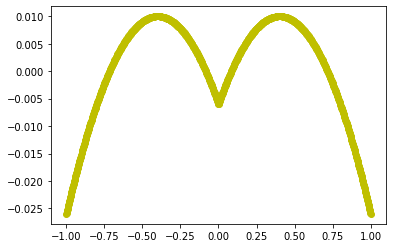

In [97]:
import matplotlib.animation as animation

def x4_line_smooth(x,y):
    a,b,c,d,e=0,0,0,0,0
    l1,l2=0.001,0.001 
    n=len(x)
    error=[]
    y_test=PolynomialRegression(4).fit(x.reshape(-1,1),y).predict(x.reshape(-1,1))
    fig=plt.figure()
    ims=[]
    #plt.rcParams['animation.ffmpeg_path'] = 'C:\FFmpeg\ffmpeg-20200115-0dc0837-win64-static\bin\ffmpeg'
    for i in range(40000):
        y_pred=[]
        for j in x:
            #此處的𝜆設置為1000
            y_pred.append(a*pow(j,4)+b*pow(j,3)+c*pow(j,2)+d*j+e+1000*a**2+1000*b**2) 
        error.append(loss(y,y_pred))
        y_pred=np.array(y_pred)
         #對損失函數中的每一個係數做偏微分
        D_a=(-2/n)*sum((2000*a+x**4)*(y-y_pred))
        D_b=(-2/n)*sum((2000*b+x**3)*(y-y_pred))
        D_c=(-2/n)*sum(x**2*(y-y_pred))
        D_d=(-2/n)*sum(x*(y-y_pred))
        D_e=(-2/n)*sum(y-y_pred)
        #在乘上學習率之後對係數做修正
        a=a-l1*D_a
        b=b-l1*D_b
        c=c-l2*D_c
        d=d-l1*D_d
        e=e-l2*D_e
        if i%1000==0:
            im=plt.plot(x,a*x**4+b*x**3+c*x**2+d*x+e+1000*a**2+1000*b**2,"r")
            ims.append(im)
            print(i)
    plt.plot(x,y,"yo")
    ani = animation.ArtistAnimation(fig, ims, interval=200,repeat_delay=1000,blit=True)
x4_line_smooth(x,y)

![SegmentLocal](smooth_curve.gif "segment") 